<a href="https://colab.research.google.com/github/diegulio/Dphi_Bootcamp/blob/master/DataSprint3_Diegulio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [ ]:
# Data
abalone_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/abalone_data/training_set_label.csv" )

In [ ]:
abalone_data.info()
# No hay datos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3132 non-null   object 
 1   Length          3132 non-null   float64
 2   Diameter        3132 non-null   float64
 3   Height          3132 non-null   float64
 4   Whole weight    3132 non-null   float64
 5   Shucked weight  3132 non-null   float64
 6   Viscera weight  3132 non-null   float64
 7   Shell weight    3132 non-null   float64
 8   Rings           3132 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 220.3+ KB


In [ ]:
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,F,0.525,0.400,0.135,0.7140,0.3180,0.1380,0.208,10
1,F,0.445,0.325,0.125,0.4550,0.1785,0.1125,0.140,9
2,M,0.710,0.540,0.165,1.9590,0.7665,0.2610,0.780,18
3,F,0.680,0.580,0.200,1.7870,0.5850,0.4530,0.600,19
4,M,0.605,0.470,0.160,1.1735,0.4975,0.2405,0.345,12


In [ ]:
num_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
cat_feature = ['Sex']
features = cat_feature + num_features

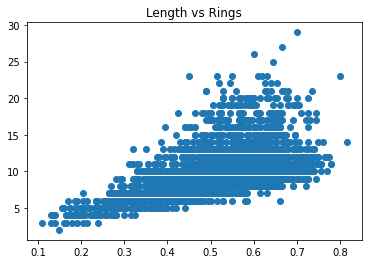

In [ ]:
# Hagamos una grafica por cada variable numerica
%matplotlib inline
plt.scatter(abalone_data['Length'], abalone_data['Rings'])
plt.title('Length vs Rings')
plt.show()


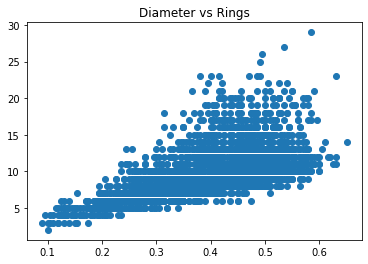

In [ ]:
plt.scatter(abalone_data['Diameter'], abalone_data['Rings'])
plt.title('Diameter vs Rings')
plt.show()

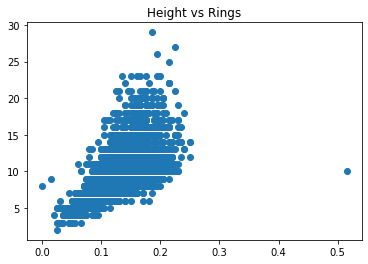

In [ ]:
plt.scatter(abalone_data['Height'], abalone_data['Rings'])
plt.title('Height vs Rings')
plt.show()

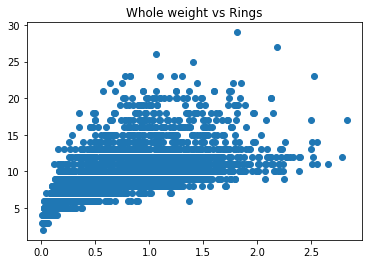

In [ ]:
plt.scatter(abalone_data['Whole weight'], abalone_data['Rings'])
plt.title('Whole weight vs Rings')
plt.show()

In [ ]:
# vamos a codigificar la categoria sexo
encoder = preprocessing.LabelEncoder()
abalone_data['Sex'] = encoder.fit_transform(abalone_data['Sex'])

In [ ]:
abalone_data.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.525,0.400,0.135,0.714,0.3180,0.1380,0.208,10
1,0,0.445,0.325,0.125,0.455,0.1785,0.1125,0.140,9
2,2,0.710,0.540,0.165,1.959,0.7665,0.2610,0.780,18


In [ ]:
# Ahora saquemonos un modelo piola, su regresion lineal a lo loko
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = abalone_data[features]
y = abalone_data['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import mean_squared_error 
lr_pred = lr_model.predict(X_test)
print('MSE: ', mean_squared_error(y_test, lr_pred))


MSE:  4.793206611735492


In [ ]:
print(mean_squared_error(y_train, lr_model.predict(X_train)))

4.91718310968065


In [ ]:
# Proximas alternativas
# Probar Otro modelo, ir de a poco para ir aprendiendo (ojo con xgboost)
# Intentar Data engineering: Usar la suma de los pesos pequeños como verdadero peso total, quiza obtener el volumen

xgboost

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(max_depth = 15, reg_lambda = 100
)


In [ ]:

xgb_model.fit(X_train, y_train)

[23:03:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=100, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# feature importance
pd.DataFrame(xgb_model.feature_importances_.reshape(1, -1), columns=features)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.052558,0.032193,0.04276,0.055423,0.087176,0.145455,0.060549,0.523886


In [ ]:
print(mean_squared_error(y_train, xgb_model.predict(X_train)))

2.3979720332870933


In [ ]:
xgb_pred = xgb_model.predict(X_test)
print(mean_squared_error(y_test, xgb_pred))

4.344212246892645


In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/abalone_data/testing_set_label.csv')
test_data['Sex'] = encoder.fit_transform(test_data['Sex'])
target= xgb_model.predict(test_data)
target


array([ 9.782601 ,  6.656805 ,  7.106976 , ...,  7.992931 , 10.168331 ,
        8.3939495], dtype=float32)

In [ ]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(target) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results_DS3.csv')         
files.download('prediction_results_DS3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
res

,prediction
0,9.782601
1,6.656805
2,7.106976
3,12.846130
4,8.519904
...,...
1039,5.234200
1040,8.605943
1041,7.992931
1042,10.168331


In [ ]:
xgb_model.fit(X,y)
target= xgb_model.predict(test_data)
# To create Dataframe of predicted value with particular respective index
res_all_data = pd.DataFrame(target) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res_all_data.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res_all_data.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res_all_data.to_csv('prediction_results_DS3_alldata.csv')         
files.download('prediction_results_DS3_alldata.csv')

[23:05:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Red neuronal

In [ ]:
from tensorflow.keras import Sequential    # import Sequential from tensorflow.keras
from tensorflow.keras.layers import Dense  # import Dense from tensorflow.keras.layers
from numpy.random import seed     # seed helps you to fix the randomness in the neural network.  
import tensorflow

In [ ]:

# define the model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(len(features),)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.01)  
model.compile(loss='mean_squared_error',optimizer=optimizer)   


In [ ]:
seed_value = 42
seed(seed_value)        # If you build the model with given parameters, set_random_seed will help you produce the same result on multiple execution


# Recommended by Keras -------------------------------------------------------------------------------------
# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# Recommended by Keras -------------------------------------------------------------------------------------


# 4. Set the `tensorflow` pseudo-random generator at a fixed value
tensorflow.random.set_seed(seed_value) 

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
573,2,0.605,0.475,0.155,1.1610,0.5720,0.2455,0.2750
3057,0,0.655,0.510,0.150,1.0430,0.4795,0.2230,0.3050
2848,2,0.620,0.500,0.165,1.3070,0.6355,0.2545,0.3150
1213,2,0.645,0.515,0.240,1.5415,0.4710,0.3690,0.5350
2093,1,0.550,0.425,0.145,0.8900,0.4325,0.1710,0.2360
...,...,...,...,...,...,...,...,...
3092,1,0.405,0.300,0.085,0.3035,0.1500,0.0505,0.0880
1095,1,0.515,0.380,0.120,0.6250,0.3265,0.1295,0.1600
1130,2,0.575,0.435,0.150,0.8050,0.2930,0.1625,0.2700
1294,0,0.675,0.565,0.195,1.8375,0.7645,0.3615,0.5530


In [ ]:
model.fit(X_train, y_train, epochs=1000, batch_size=30, verbose = 1)

Epoch 1/1000
79/79 [==============================] - 0s 874us/step - loss: 4.4644
Epoch 2/1000
79/79 [==============================] - 0s 792us/step - loss: 4.4107
Epoch 3/1000
79/79 [==============================] - 0s 764us/step - loss: 4.4836
Epoch 4/1000
79/79 [==============================] - 0s 769us/step - loss: 4.4154
Epoch 5/1000
79/79 [==============================] - 0s 777us/step - loss: 4.4530
Epoch 6/1000
79/79 [==============================] - 0s 789us/step - loss: 4.4699
Epoch 7/1000
79/79 [==============================] - 0s 803us/step - loss: 4.4925
Epoch 8/1000
79/79 [==============================] - 0s 811us/step - loss: 4.4585
Epoch 9/1000
79/79 [==============================] - 0s 779us/step - loss: 4.4489
Epoch 10/1000
79/79 [==============================] - 0s 791us/step - loss: 4.4306
Epoch 11/1000
79/79 [==============================] - 0s 859us/step - loss: 4.4194
Epoch 12/1000
79/79 [==============================] - 0s 841us/step - loss: 4.4629
E

In [ ]:
model.evaluate(X_test, y_test)

25/25 [==============================] - 0s 734us/step - loss: 4.4072


4.407165050506592

Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(max_depth = 15, max_leaf_nodes = 15, n_estimators = 200)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=15,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
mean_squared_error(y_train, rf_model.predict(X_train))

4.499249654548232

In [ ]:
mean_squared_error(y_test, rf_model.predict(X_test))

4.759018448972748